C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
358/358 - 396s - 1s/step - accuracy: 0.9532 - loss: 0.1946 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9486 - val_loss: 0.2040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
358/358 - 397s - 1s/step - accuracy: 0.9532 - loss: 0.1902 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9486 - val_loss: 0.2027 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
358/358 - 375s - 1s/step - accuracy: 0.9532 - loss: 0.1904 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9486 - val_loss: 0.2027 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
358/358 - 353s - 986ms/step - accuracy: 0.9532 - loss: 0.1898 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9486 - val_loss: 0.2026 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
358/358 - 364s - 1s/step - accuracy: 0.9532 - loss: 0.1898 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9486 - val_loss: 0.2032 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Accuracy: 0.9531550407409668
Validation Accuracy: 0.9486193656921387
Test Accuracy: 0.9491051435470581
Confusion Matrix:
[[3394    0]
 [ 182    0]]


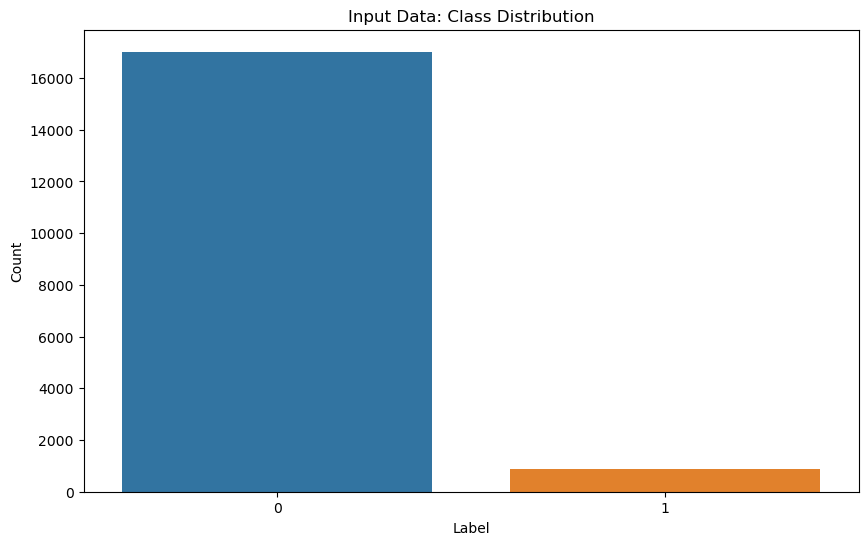

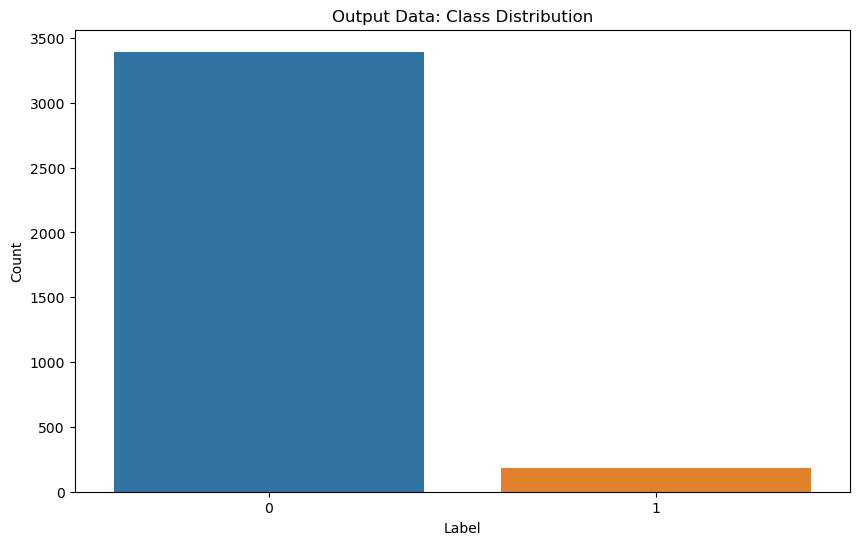

112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step


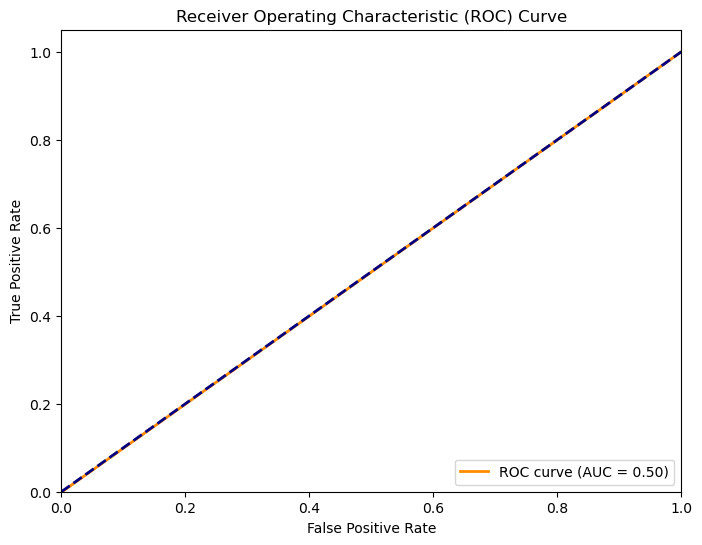

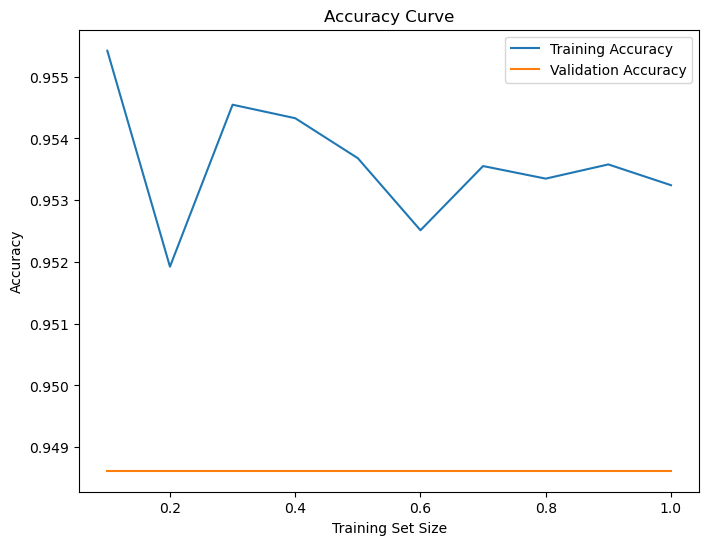

112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step


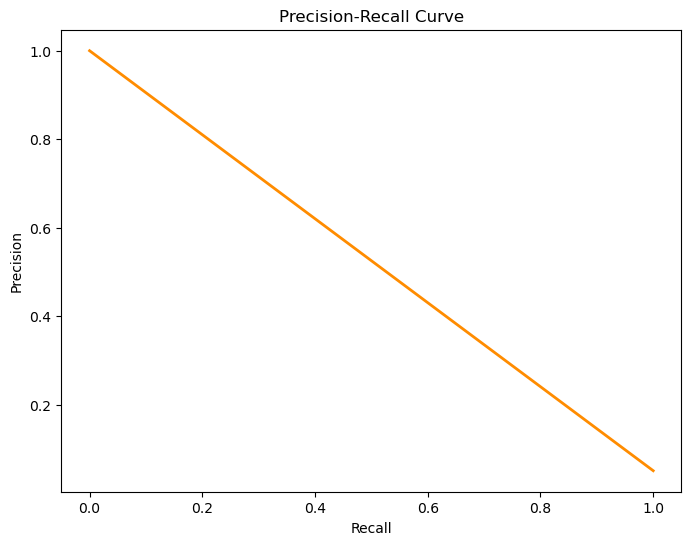

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, auc

# Load the preprocessed CSV file
df = pd.read_csv('fakejob preprocessed data.ipynb.csv')

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(df['text'])
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = max([len(seq) for seq in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Define the LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

# Train the LSTM model
history = model.fit(X_train_padded, y_train, validation_data=(X_val_padded, y_val), epochs=10, batch_size=32, verbose=2)

# Evaluate the LSTM model on the test data
y_pred_lstm = model.predict(X_test_padded) > 0.5
print("LSTM Model Classification Report:")
print(classification_report(y_test, y_pred_lstm.astype(int), target_names=['fake', 'real']))
print("Training Accuracy:", model.evaluate(X_train_padded, y_train, verbose=0)[1])
print("Validation Accuracy:", model.evaluate(X_val_padded, y_val, verbose=0)[1])
print("Test Accuracy:", model.evaluate(X_test_padded, y_test, verbose=0)[1])
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lstm.astype(int)))

# Data Visualization Tasks

## Input Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Input Data: Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Output Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df.loc[y_test.index])
plt.title('Output Data: Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## ROC Curve
y_pred_prob = model.predict(X_test_padded)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Accuracy Curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
val_scores = []
for size in train_sizes:
    model.fit(X_train_padded[:int(len(X_train_padded) * size)], y_train[:int(len(y_train) * size)], validation_data=(X_val_padded, y_val), epochs=5, batch_size=32, verbose=0)
    train_scores.append(model.evaluate(X_train_padded[:int(len(X_train_padded) * size)], y_train[:int(len(y_train) * size)], verbose=0)[1])
    val_scores.append(model.evaluate(X_val_padded, y_val, verbose=0)[1])

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores, label='Training Accuracy')
plt.plot(train_sizes, val_scores, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

## Precision-Recall Curve
y_pred_prob = model.predict(X_test_padded)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
  
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Random Forest Model Classification Report:
              precision    recall  f1-score   support

        fake       0.96      1.00      0.98      3394
        real       1.00      0.14      0.25       182

    accuracy                           0.96      3576
   macro avg       0.98      0.57      0.61      3576
weighted avg       0.96      0.96      0.94      3576

Training Accuracy: 0.9590106624715958
Validation Accuracy: 0.9542118140510311
Test Accuracy: 0.9563758389261745
Confusion Matrix:
[[3394    0]
 [ 156   26]]


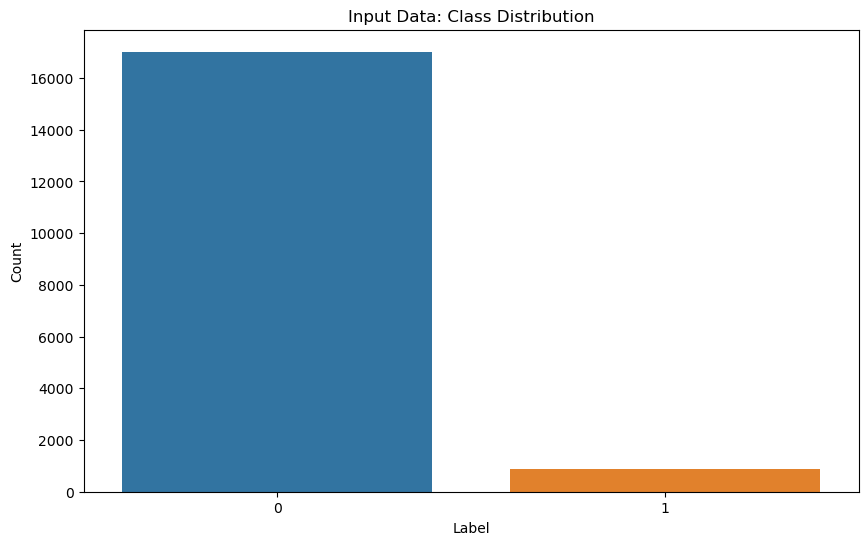

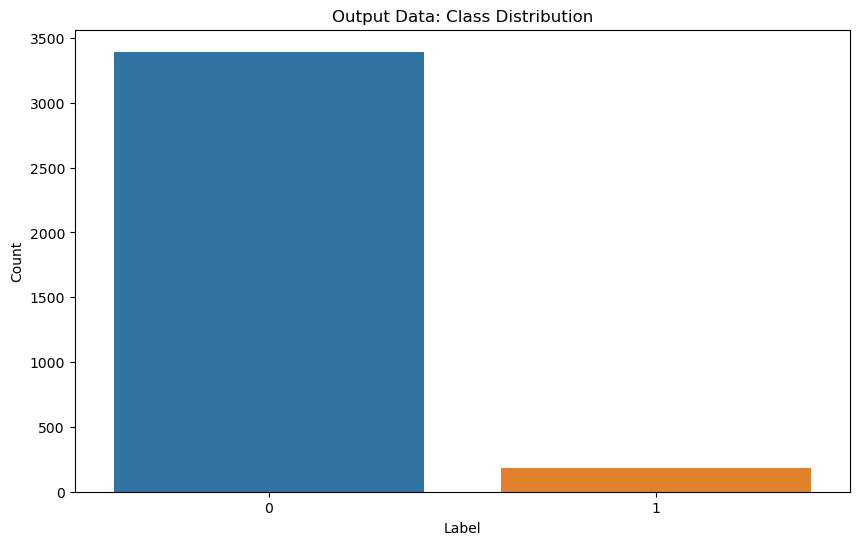

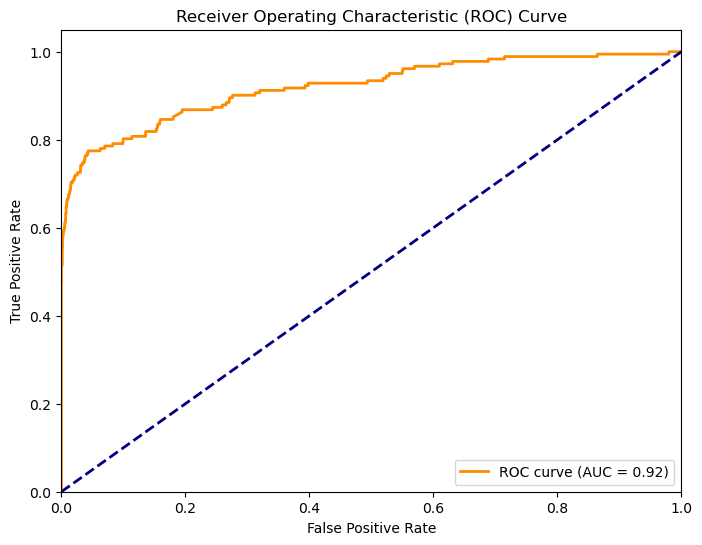

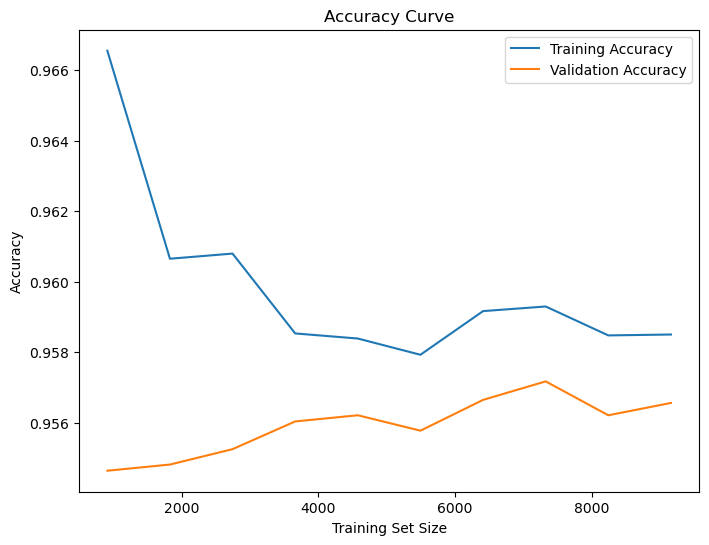

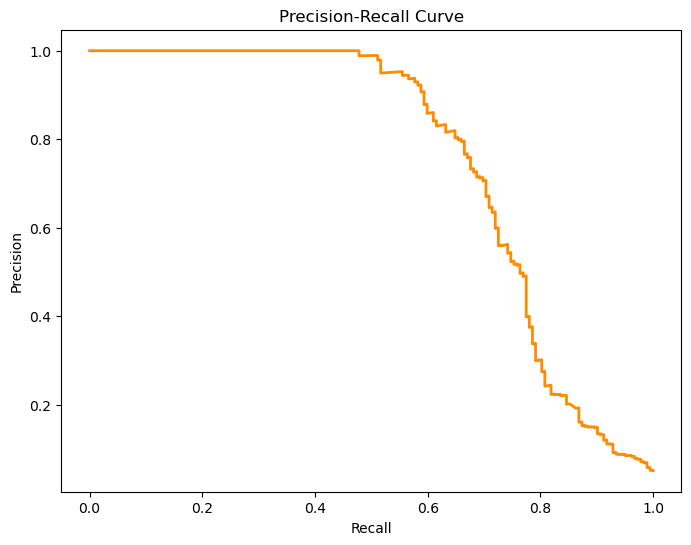

In [2]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, auc

# Load the preprocessed CSV file
df = pd.read_csv('fakejob preprocessed data.ipynb.csv')

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert the text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)
X_test_vectorized = vectorizer.transform(X_test)

# Define the hyperparameters for grid search
rf_hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

# Perform grid search for Random Forest model
best_rf_model = None
best_rf_accuracy = 0
for n_estimators in rf_hyperparameters['n_estimators']:
    for max_depth in rf_hyperparameters['max_depth']:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train_vectorized, y_train)
        train_accuracy = model.score(X_train_vectorized, y_train)
        val_accuracy = model.score(X_val_vectorized, y_val)
        if val_accuracy > best_rf_accuracy:
            best_rf_model = model
            best_rf_accuracy = val_accuracy

# Generate classification report for the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test_vectorized)
print("Random Forest Model Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['fake', 'real']))
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", best_rf_model.score(X_test_vectorized, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Data Visualization Tasks

## Input Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Input Data: Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Output Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df.loc[y_test.index])
plt.title('Output Data: Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## ROC Curve
y_pred_prob = best_rf_model.predict_proba(X_test_vectorized)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Accuracy Curve
train_sizes, train_scores, val_scores = learning_curve(best_rf_model, X_train_vectorized, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

## Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

        fake       0.98      1.00      0.99      3394
        real       0.92      0.63      0.75       182

    accuracy                           0.98      3576
   macro avg       0.95      0.81      0.87      3576
weighted avg       0.98      0.98      0.98      3576

Training Accuracy: 0.9988638349938822
Validation Accuracy: 0.9786787836420832
Test Accuracy: 0.9784675615212528
Confusion Matrix:
[[3384   10]
 [  67  115]]


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


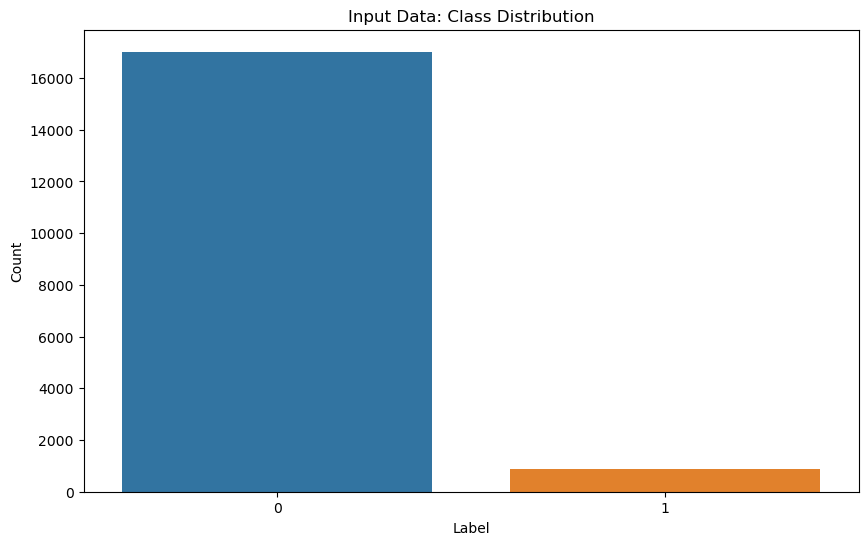

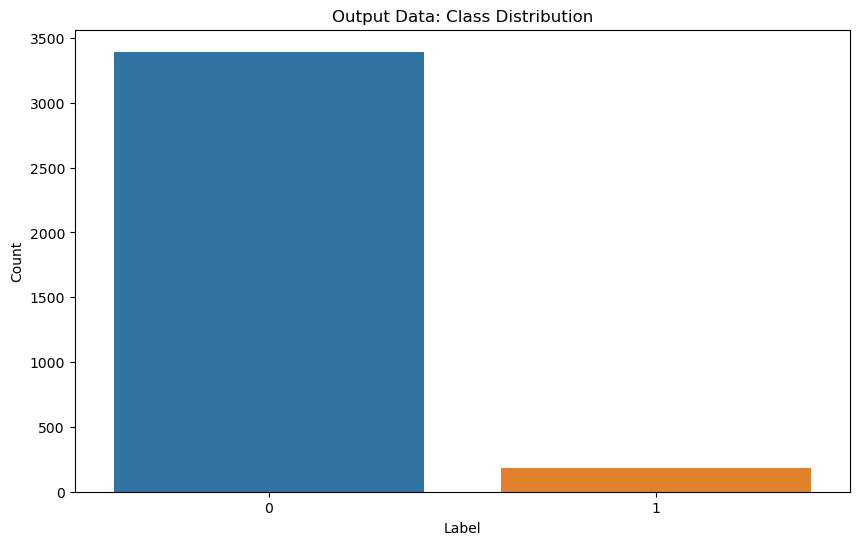

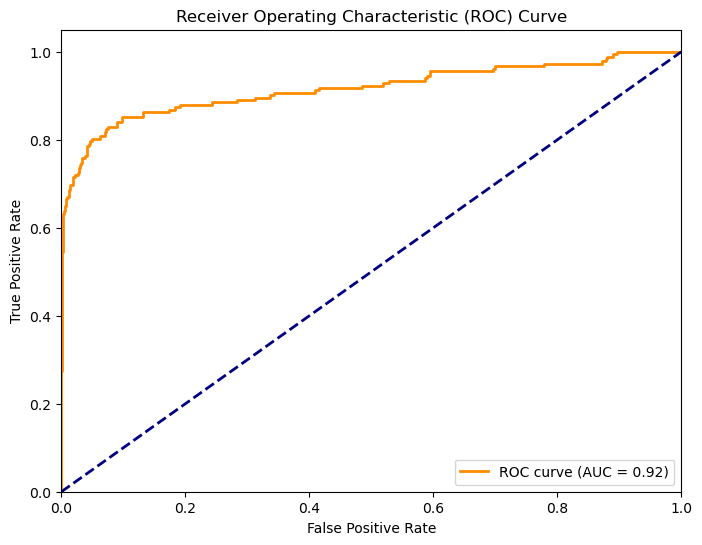

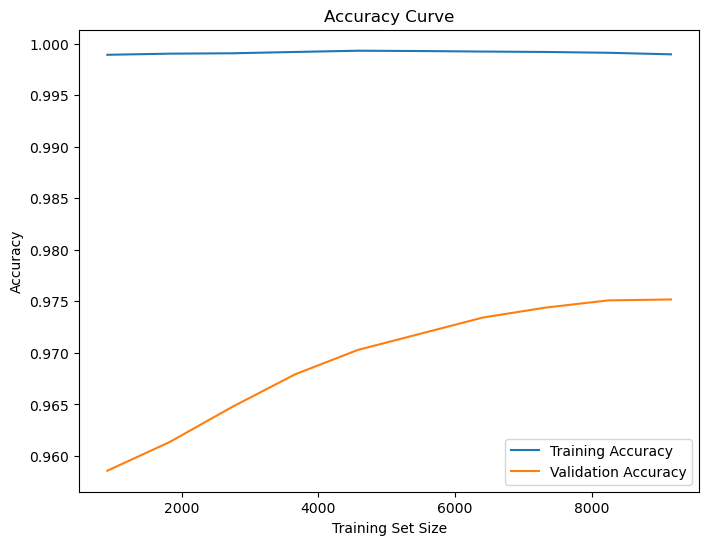

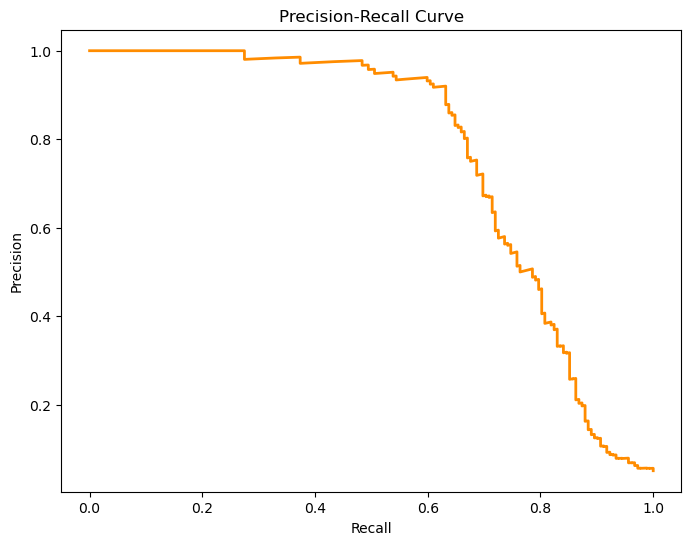

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, auc

# Load the preprocessed CSV file
df = pd.read_csv('fakejob preprocessed data.ipynb.csv')

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert the text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model
log_reg_model.fit(X_train_vectorized, y_train)

# Generate classification report for the Logistic Regression model
y_pred_log_reg = log_reg_model.predict(X_test_vectorized)
print("Logistic Regression Model Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['fake', 'real']))
print("Training Accuracy:", log_reg_model.score(X_train_vectorized, y_train))
print("Validation Accuracy:", log_reg_model.score(X_val_vectorized, y_val))
print("Test Accuracy:", log_reg_model.score(X_test_vectorized, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Data Visualization Tasks

## Input Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Input Data: Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Output Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df.loc[y_test.index])
plt.title('Output Data: Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## ROC Curve
y_pred_prob = log_reg_model.predict_proba(X_test_vectorized)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Accuracy Curve
train_sizes, train_scores, val_scores = learning_curve(log_reg_model, X_train_vectorized, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

## Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()